-------------------
####Title: Homework 4 - Python
####Topic: Regression in Python
####Dataset: Tornados
####Author: Shakir Ahmed
####Date: 2023-11-13 (YYYY-MM-DD)
-------------------

## Loading packages

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data set load:

##Tornados dataset Data Dictionary:

|variable     |class     |description  |
|:------------|:---------|:------------|
|om           |integer   |Tornado number. Effectively an ID for this tornado in this year.|
|yr           |integer   |Year, 1950-2022. |
|mo           |integer   |Month, 1-12.|
|dy           |integer   |Day of the month, 1-31. |
|date         |date      |Date. |
|time         |time      |Time. |
|tz           |character |Canonical tz database timezone.|
|datetime_utc |datetime  |Date and time normalized to UTC. |
|st           |character |Two-letter postal abbreviation for the state (DC = Washington, DC; PR = Puerto Rico; VI = Virgin Islands). |
|stf          |integer   |State FIPS (Federal Information Processing Standards) number. |
|mag          |integer   |Magnitude on the F scale (EF beginning in 2007). Some of these values are estimated (see fc). |
|inj          |integer   |Number of injuries. When summing for state totals, use sn == 1 (see below). |
|fat          |integer   |Number of fatalities. When summing for state totals, use sn == 1 (see below). |
|loss         |double    |Estimated property loss information in dollars. Prior to 1996, values were grouped into ranges. The reported number for such years is the maximum of its range. |
|slat         |double    |Starting latitude in decimal degrees. |
|slon         |double    |Starting longitude in decimal degrees. |
|elat         |double    |Ending latitude in decimal degrees. |
|elon         |double    |Ending longitude in decimal degrees. |
|len          |double    |Length in miles. |
|wid          |double    |Width in yards. |
|ns           |integer   |Number of states affected by this tornado. 1, 2, or 3. |
|sn           |integer   |State number for this row. 1 means the row contains the entire track information for this state, 0 means there is at least one more entry for this state for this tornado (om + yr). |
|f1           |integer   |FIPS code for the 1st county. |
|f2           |integer   |FIPS code for the 2nd county. |
|f3           |integer   |FIPS code for the 3rd county. |
|f4           |integer   |FIPS code for the 4th county. |
|fc           |logical   |Was the mag column estimated? |


Using Pandas dataset to read the csv file in github `data` folder. Data cleaning is done to remove all the NA values from the data. This reduces the total data instances from 68,693 to 41,517. We are going to use these instances for further processing.

In [201]:
tornado = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/hw-04-Shakir-Ahmed/main/data/tornados.csv', header='infer', na_values='NA')

# Drop rows with empty or NA values
tornado = tornado.dropna()

#Displaying the data head
tornado

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3000,15.80,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0000,2.00,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0000,0.10,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0000,0.10,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0000,2.00,37,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68683,621917,2022,9,27,2022-09-27,19:30:00,America/Chicago,2022-09-28T00:30:00Z,FL,12,...,-80.3499,1.39,100,1,1,99,0,0,0,False
68685,621919,2022,9,27,2022-09-27,23:31:00,America/Chicago,2022-09-28T04:31:00Z,FL,12,...,-80.3297,0.06,50,1,1,11,0,0,0,False
68686,621920,2022,9,28,2022-09-28,00:25:00,America/Chicago,2022-09-28T05:25:00Z,FL,12,...,-81.0912,1.09,75,1,1,43,0,0,0,False
68687,621921,2022,9,28,2022-09-28,03:56:00,America/Chicago,2022-09-28T08:56:00Z,FL,12,...,-80.0680,0.20,50,1,1,99,0,0,0,False


# Scatter plot

Below is the code to create a scatter plot of the tornados dataset. Variables considered for this plot is `wid` which is the width of the tornado and the `fat` column, which is the total number of fatalities due to the tornado. A smoothing line (best fit) is created using the seaborn library and using sns.regplot with scatter plot and a smooth line fit.

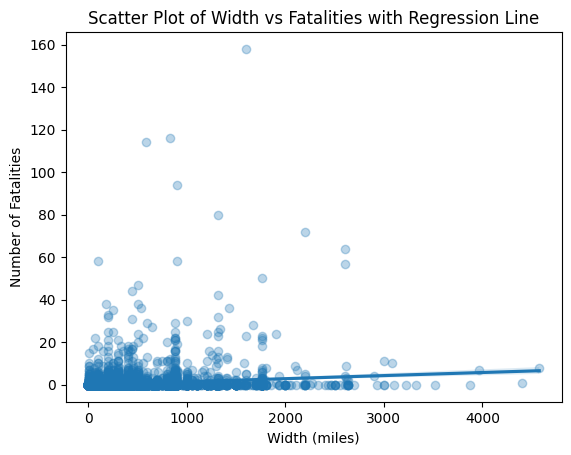

In [202]:
# Scatter plot with a regression line for tornado data
sns.regplot(x='wid', y='fat', data=tornado, scatter_kws={'alpha':0.3})
plt.title('Scatter Plot of Width vs Fatalities with Regression Line')
plt.xlabel('Width (miles)')
plt.ylabel('Number of Fatalities')
plt.show()

# Multiple Linear Regression

Multiple Linear Regression explores the connection between a dependent variable and several independent variables. It extends simple linear regression, enabling the assessment of multiple predictors' impact on the outcome. This method builds a linear equation to predict the dependent variable, making it effective for analyzing complex datasets and understanding relationships among multiple factors.

## Step 1: Split Input Data into Training and Test Sets

In this step, we are going to define the variables needed for consideration as well as defining what parameter we want to predict. I am choosing to split the dataset as 80% for testing (as defined in the original honework) and 20% for training.
Total number of instances after cleaning is 41,517. I am going to split the data into the following:

Testing- 20% - 8304

Training- 80% - 33213

In [203]:
# Initialising columns
X = tornado[['wid']]
y = tornado[['fat']]

# Set the number of instances,training and testing
numInstances= len(tornado) # Total number of rows in the data
numTrain = 33213  # number of training instances as 20% of complete data
numTest = numInstances - numTrain

# Split data into training and testing sets
X_test = X[-numTest:]
X_train = X[:-numTest]
y_test = y[-numTest:]
y_train = y[:-numTest]

## Step 2: Fit Regression Model to Training Set
Following lines of code is to initiate the regression model and use the `X_train` and `y_train` data frames for training of the model.

In [204]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression()

## Step 3: Apply Model to the Test Set
Now that the model is trained using the training dataset, we are going to predict the values of y based on the `X_test` dataframe. I.e. we are going to predict the total number of fatalities based on the width of tornado in th testing data frame.

In [205]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

## Step 4: Evaluate Model Performance on Test Set
For the ease of comprehension, we are going to plot the `y_test` which is the true value, vs the `y_pred_test`, which is the prediction parameter which we found in the above step. Now, it is easy to visualize the true values vs predicted values.

Root mean squared error = 2.2485


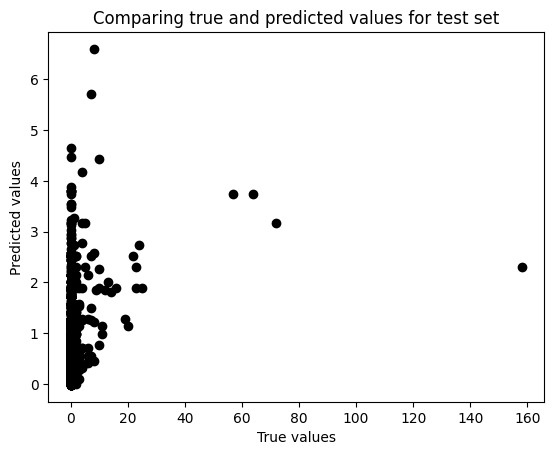

In [206]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values')
plt.ylabel('Predicted values')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

**Observation:** From the aboev plot, we can find out that most of the actual values and predicted values lie within the range of 0 to a little over 100. There are some outliers in the plot, however for the evaluation of model performance, we will find out parameters like Root Mean Squared error and R-Squared error.

RMS error is 20.08, and R-Squared error is 0.067.

In [207]:
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

R-squared = 0.0396


## Step 5: Postprocessing
To plot another visual, we are going to calculate the slope and interecept to recreate a line with a fit with the general line equation y=mx+c, where x and y are the `length` and `injuries` variables, `m` is the slope and `c` is the intercept.

In [208]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])

Slope =  0.0014475691781841713


In [209]:
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

Intercept =  -0.022230352633858835


Below plot is to plot the scatter plot of original data of `X-test` and `y_test` as a scatter plot, and `X_test` and `y_pred_test` as a line plot to show the line plot of the testing vs predicted outcmoe.

Text(0, 0.5, 'y')

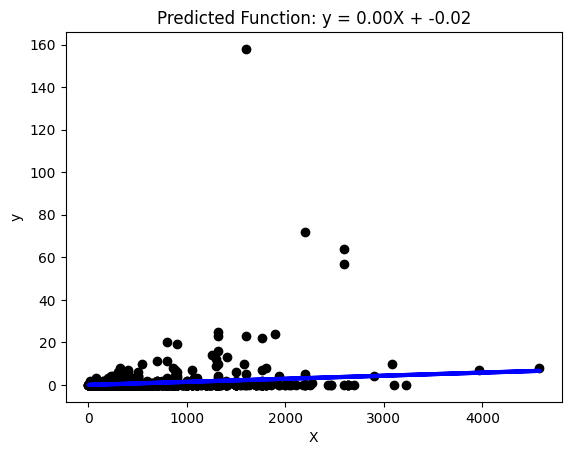

In [210]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

# Effect of Correlated Attributes


In [211]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is your DataFrame

variable_names = tornado[['om','slat', 'slon', 'elat', 'elon', 'f1', 'f2', 'f3', 'f4', 'yr', 'mo', 'dy', 'len', 'wid']]
X = tornado['elon']

for i in range(variable_names.shape[1]):
    X2 = variable_names.iloc[:, i]

    # Calculate correlation matrix for the current pair
    c = np.corrcoef(np.column_stack((X[:-numTest], X2[:-numTest])).T)
    titlestr = f'Correlation between X and X2 ({variable_names.columns[i]}) = {c[0, 1]:.4f}'
    print(f"{titlestr}:\n{X2}\n")

Correlation between X and X2 (om) = -0.0812:
0           192
1           193
2           195
3           196
4           197
          ...  
68683    621917
68685    621919
68686    621920
68687    621921
68691    621900
Name: om, Length: 41517, dtype: int64

Correlation between X and X2 (slat) = -0.0081:
0        36.7300
1        34.1700
2        37.3700
3        38.2000
4        32.4200
          ...   
68683    26.7338
68685    26.1123
68686    26.8270
68687    26.5282
68691    41.0210
Name: slat, Length: 41517, dtype: float64

Correlation between X and X2 (slon) = 0.0394:
0       -102.5200
1        -78.6000
2        -87.2000
3        -84.5000
4        -89.1300
           ...   
68683    -80.3355
68685    -80.3297
68686    -81.0781
68687    -80.0680
68691    -80.6559
Name: slon, Length: 41517, dtype: float64

Correlation between X and X2 (elat) = -0.9780:
0        36.8800
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
68683    26.7487
68685    2

Text(0.5, 1.0, 'Correlation between X4 and X5 = 0.4364')

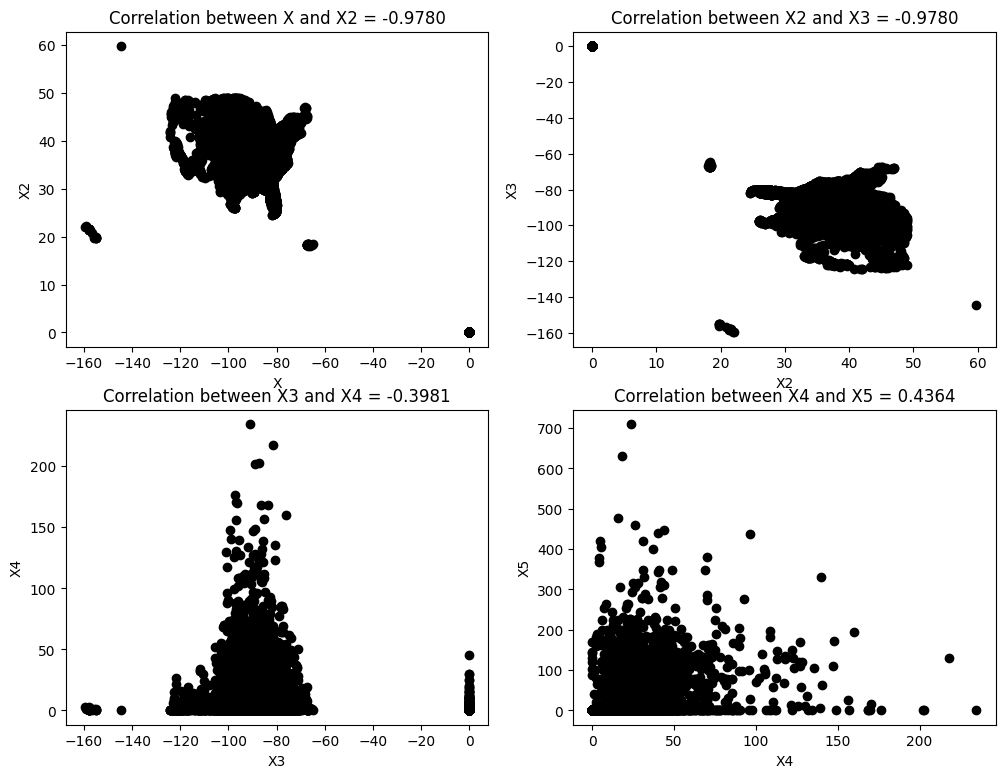

In [212]:
# Generate correlated variables
X2 = tornado[['elat']]
X3 = tornado[['elon']]
X4 = tornado[['len']]
X5 = tornado[['f3']]

# Plot and calculate correlation for X and X2
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

# Plot and calculate correlation for X2 and X3
ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

# Plot and calculate correlation for X3 and X4
ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

# Plot and calculate correlation for X4 and X5
ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)


In [213]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

In [214]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

LinearRegression()

In [215]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

LinearRegression()

In [216]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

LinearRegression()

In [217]:
regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train)

LinearRegression()

In [218]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,2.367792e-02
1,-0.00 X + 0.01 X2 + 0.03,1.719698,2.298646,3.286357e-02
2,-8332746129.31 X + 0.01 X2 + 8332746129.31 X3 ...,1.719699,2.298737,1.666549e+10
3,-16735462853.12 X + -0.00 X2 + 16735462853.12 ...,1.680170,2.215674,3.347093e+10
4,-24567630876.61 X + -0.00 X2 + 24567630876.61 ...,1.679475,2.216244,4.913526e+10


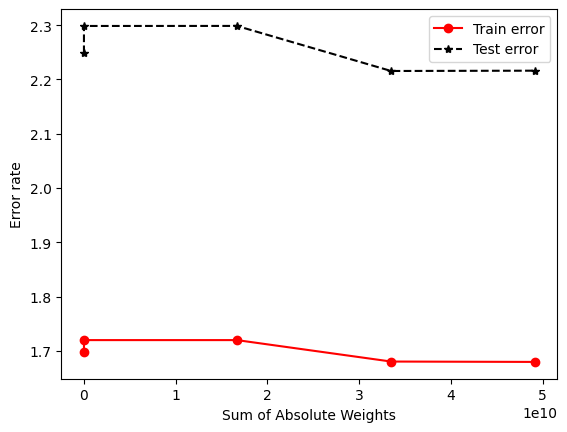

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)),
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)),
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1],
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)),
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1],
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)),
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0],
                                        regr5.coef_[0][1], regr5.coef_[0][2],
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)),
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results